## 07. Non-linear poisson equation(1)

### Newton method
* Solve $x^2-1=0$.
  - Its solution is $x=\pm1$, of course.
  - First, assume a temporal solution, $x_0$.
  - Then, define how far we are from the real solution. $r(x_0)=x_0^2-1 $
  - For the exact solutions, it becomes zero.
  - We hope that the next solution, $x+\delta x$, becomes the exact solution. $(x_0+\delta x)^2-1=0$
  - Simple manipulation yields $2x_0\delta x+(\delta x)^2=-(x_0^2-1)$
  - We can calculate $\delta x$ with the first-order approximation.

### An example
* Start from $x_0=2$.
  - Remember that $2x_0\delta x+(\delta x)^2 \approx 2x_0\delta x =-(x_0^2-1)$
  - Therefore, $\delta x=-3/4$.
  - Then, we set $x_1=x_0+\delta x=5/4$, which is already much closer 1.
  - Once again, $2x_1\delta x=-(x_1^2-1)$ and $\delta x = -9/40$
  - Now, we have $x_2=x_1+\delta x =41/40$
* Start from $x_0=-2$. Is your solution approaching to 1?

  - $2x_0\delta x+(\delta x)^2 \approx 2x_0\delta x =-(x_0^2-1)$\
    2차항을 무시하여, 간단히 풀 수 있는 선형 방정식이 되었다.\
    중요한 것은 $x^2-1=0$이 아니라 임의의 $f(x)=0$에 대해서도 성립한다. 이 때 잠정적인 해가 $x_0$일 때, 오차는 쉽게 $f(x_0)$로 쓸 수 있게 된다.\
    보정항을 여전히 $\delta x$로 쓰면, $f(x_0+\delta x)=0$\
    유사한 선형 근사를 통하여

    $$\left. \frac{df}{dx}\right|_{x_0} \delta x=-f(x_0)$$
    $\left. \frac{df}{dx}\right|_{x_0} $: Jacobian\
    $\delta x $: update $\phi$\
    $-f(x_0) $: residue
    
    이 식은 $2x_0\delta x =-(x_0^2-1)$과 같다.\
    위의 우변에 나타난 오차인 $f(x_0)$를 선형 근사의 한계 내에서 최대한 제거할 수 있는 $\delta x$를 찾는 것이다.\
    오차$f(x_0)$와 미분산 $\left.\frac{df}{dx}\right|_{x_0}$을 구해야 한다.
* 반도체 내부에서 알짜 전하량이 0이 된다면, 전자, 홀 그리고 불순물에 의한 전하량들의 합이 0이 되어야 할 것이다. 각자의 전하량을 생각하면\
    $-n+p+N_dop^+=0$ 과 같은 식이 성립해야 한다. 평형상태에 놓인 반도체에서\
    $$n=n_{int}exp\left(\frac{\phi}{V_T}\right) $$ $$p=n_{int}exp\left(-\frac{\phi}{V_T}\right) $$
    와 같은 관계식이 성립함을 이용하여, 평형상태에서의 electrostatic potential을 구하자. 여기서, thermal voltage V_T는 kB*T/q이다.

### Coupled nonlinear equations
* 지금까지 하나의 변수에 대한 하나의 비선형 방정식을 풀었다. 이제 이 방법을 확장하여 여러 개의 변수들에 대한 비선형 방정식들의 집합을 풀자.\
  이 방법을 <span style="color:red">**Newton Raphson**</span> 방법이라 한다.
* Consider a set of coupled nonlinear equations.
  - Three variables, $\phi_1, \phi_2$ and $\phi_3$
  - Thre equations read   
$$
\begin{align}
f_1(\phi_1,\phi_2,\phi_3) & = \quad \quad \quad \quad \phi_2-2\phi_1-exp(\phi_1) & = 0 \\
f_2(\phi_1,\phi_2,\phi_3) & = \quad \phi_3-2\phi_2+\phi_1-exp(\phi_2) & = 0 \\
f_3(\phi_1,\phi_2,\phi_3) & = -2\phi_3+\phi_2 \quad \quad \quad     -exp(\phi_3)+4 & = 0
\end{align}
$$ 
* 이들은 모두 비선형 함수이다. 비선형성은 exponential 함수로부터 생긴다. 우리는 이 세 식을 만족하는 $\phi_1,\phi_2,\phi_3$을 찾는 것이다.
* 여기에서 poisson의 N은 f1,f2,f3이고 여기에서는 반복수는 표시되지 않았음.
  - How can we find the solution by using a numerical means?

### Newton-Raphson method(1)

<span style="color:red">**첫번째 iteration $\phi^0$에서 0이 초기값이 되고, f1,f2,f3는 laplace의 node 3(x축)로하여 전하(n,p,Ndop)가 있는 poisson 방정식(laplace) -> Ax=b에서 x vector 즉 phi를 구하고, 이 때 사용하는 것이 비선형(n,p)이 0이 되면, jacob matrix를 빠져 나오지만, 만약 만족하는 n,p를 구하지 못하면 -> 두번째 iteration를 돌면서 $\phi^1=\phi^0+\delta\phi$를 진행하면 비선형(n,p,phi)를 구할 수 있게 된다**</span>'

* What is our goal?
  - To find a set of $\phi_1,\phi_2,\phi_3$, which satisfies
$$
\begin{bmatrix}
f_1(\phi_1,\phi_2,\phi_3) \\
f_2(\phi_1,\phi_2,\phi_3) \\
f_3(\phi_1,\phi_2,\phi_3)
\end{bmatrix}=
\begin{bmatrix}
0 \\ 0 \\ 0
\end{bmatrix}
$$
  - Of course, we dont know the solution.
  - We can make a guess, 미지수가 3개$(\phi_1, \phi_2, \phi_3)$, 어림짐작 0(initial value), $\phi^0=[\phi_1^0, \phi_2^0, \phi_3^0]^T$, 미지수가 1개, 어림짐작한 값 $x_0$과 같음.
  - 첫번째 iteration f1, 
$$\phi^0=
\begin{bmatrix}
\phi_1^0 \\ \phi_2^0 \\ \phi_3^0
\end{bmatrix}
$$
  - 그리고 residue vecotr r를 다음과 같이 많은 경우, r은 위치 벡텨를 나타내지만, non-linear에서는 vector, residue vecotr를 나타냄을 알아야 한다. 어림짐작이 운 좋게 정확하게 해가 되지 않는 한, residue 벡터는 영벡터가 될 수 없고, 반복을 해야 한다.(iteration)
$$r=
\begin{bmatrix}
f_1(\phi_1^0,\phi_2^0,\phi_3^0 ) \\ f_2(\phi_1^0,\phi_2^0,\phi_3^0) \\ f_3(\phi_1^0,\phi_2^0,\phi_3^0 )
\end{bmatrix}
\ne
\begin{bmatrix}
0 \\ 0 \\ 0
\end{bmatrix}
$$
비선형 미지수가 1개인 $x^2-1$에서 어림짐작 값 $x_0$과 iteration 처럼, 미지수가 여러개일 경우(여기에서 3개 $(\phi_1, \phi_2, \phi_3)$)를 알아보자.
우리는 올바른 해가 아닌 $\phi_1^0,\phi_2^0,\phi_3^0 $를 수정해주어서, 이 residue 벡터를 영벡터에 가깝게 만들어야 한다. 바로 residue 벡터의 각 성분들이 각 방정식에 대한 오차를 나타낸다고 볼 수 있기 때문이다.

### Newton-Raphson method(2)
그럼 더 나은 solution 벡터를 만들기 위해서 기존의 벡터에 더해주어야 하는 벡터인 update 벡터를 고려해서 해(0)에 접근하게 된다.  $\delta \phi$라고 표시하고, 다음과 같은 성분들을 가지고 있다고 하면,
$$\delta\phi=
\begin{bmatrix}
\delta\phi_1 \\ \delta\phi_2 \\ \delta\phi_3
\end{bmatrix}
$$
개선된 solution vector가 $\phi^0+\delta\phi$라고 한다면, $\phi^0+\delta\phi$가 고려하는 방정식들의 해들로 이루어진 벡터가 되는 것이다.  
<span style="color:red">**0 벡터가 된다.**</span>
$$
\begin{bmatrix}
f_1(\phi_1^0+\delta\phi_1,\phi_2^0+\delta\phi_2,\phi_3^0+\delta\phi_3 ) \\ 
f_2(\phi_1^0+\delta\phi_1,\phi_2^0+\delta\phi_2,\phi_3^0+\delta\phi_3 ) \\ 
f_3(\phi_1^0+\delta\phi_1,\phi_2^0+\delta\phi_2,\phi_3^0+\delta\phi_3 )
\end{bmatrix}
\textcolor{red}{=}\begin{bmatrix}
0 \\ 0 \\ 0
\end{bmatrix}
$$
이 식은 표시만 다르게 하였을 뿐, 원래 문제와 같다. 즉, 여전히 비선형 방정식들의 집합이라는 뜻이다. 이것을 풀기가 어려우므로, 
$$f(x_0+\delta x)=0$$
$$\left. \frac{df}{dx}\right|_{x_0} \delta x=-f(x_0)$$
근사되는 것과 마찬가지로, $\delta\phi$ 벡터의 각 성분들이 작다고 가정하여서 선형화한다.
$$
\begin{bmatrix}
\textcolor{red}{f_1(\phi_1^0,\phi_2^0,\phi_3^0 )} \\ f_2(\phi_1^0,\phi_2^0,\phi_3^0) \\ f_3(\phi_1^0,\phi_2^0,\phi_3^0 )
\end{bmatrix}
+
\begin{bmatrix}
\textcolor{red}{\frac{\partial f_1}{\partial \phi_1} \frac{\partial f_1}{\partial \phi_2} \frac{\partial f_1}{\partial \phi_2}} \\
\frac{\partial f_2}{\partial \phi_1} \frac{\partial f_2}{\partial \phi_2} \frac{\partial f_2}{\partial \phi_2} \\
\frac{\partial f_3}{\partial \phi_1} \frac{\partial f_3}{\partial \phi_2} \frac{\partial f_3}{\partial \phi_2} \\
\end{bmatrix}
\begin{bmatrix}
\textcolor{red}{\delta \phi_1} \\ \textcolor{red}{\delta \phi_2} \\ \textcolor{red}{\delta \phi_3}
\end{bmatrix}
=\begin{bmatrix}
\textcolor{red}{0} \\ 0 \\ 0
\end{bmatrix}
$$
noe1은 빨간색으로 푼다.   


### Newton-Raphson method(3)
여기서 좌변에 등장하는 정사각형렬의 성분들인 편미분 값들은 현재의 $\phi_1^0, \phi_2^0, \phi_3^0$를 기준으로 하여 구해짐에 유의하자. 이 정삭행렬은 Jacobian 행렬이라고 불린다. 이 식은 특별한 것이 아니며, 
$$
\begin{bmatrix}
f_1(\phi_1^0+\delta\phi_1,\phi_2^0+\delta\phi_2,\phi_3^0+\delta\phi_3 ) \\ 
f_2(\phi_1^0+\delta\phi_1,\phi_2^0+\delta\phi_2,\phi_3^0+\delta\phi_3 ) \\ 
f_3(\phi_1^0+\delta\phi_1,\phi_2^0+\delta\phi_2,\phi_3^0+\delta\phi_3 )
\end{bmatrix}
\textcolor{red}{=}\begin{bmatrix}
0 \\ 0 \\ 0
\end{bmatrix}
$$
의 각각의 행들을 선형 근사한 후 다시 행렬의 형태로 정한 것에 불과하다. Jacobian 행렬을 J라고 표기하면, 다음과 같이 간략하게 쓸 수 있다.   
$$J\delta \phi=-r $$
이것은 Ax=b의 꼴을 가지고 있기 때문에 주어진 Jacobian 행렬과 residue 벡터가 있으면 $\delta\phi$ 벡터를 구할 수 있다. 이렇게 구한 update 벡터를 원래의 어림짐작 해였던 $\phi^0$에 더해주어 개선된 해인  $\textcolor{red}{\phi^1=\phi^0+\delta\phi}$을 만들 수 있다.   
이제 마치 $\textcolor{red}{\phi^1}$이 초기의 어림짐작인 것처럼 취급하여서 위에 나타난 동일한 과정을 반복할 수 가 있다. 그럼 그 결과로 $\textcolor{red}{\phi^2}$를 얻게 될 것이며, 이 과정은 계속 반복된다. 매번 해가 조금 더 진정한 해에 가까워진다면, 이러한 과정을 모두 거치고 나서 해에 몹시 가까운 근사적인 해를 구할 수 있을 것이다. 각각의 반복 시행마다 r과 $\delta \phi$ 벡터들을 관찰하여서, 이 벡터들이 영벡터에 충분히 가까워지면 반복하기를 멈춘다. "충분히"라는 표현은 모호함이 있는데, 보통 사용자가 원하는 오차 수준을 미리 정해놓고 이보다 작은 오차가 생기는 상황을 충분하다고 본다. 예를 들자면, 점들에서의 electrostatic potential의 변화량들로 구성된 $\delta\phi$ 벡터가 있다면, 절댓값을 취한 후 구한 최대 성분이 $\textcolor{red}{10^{-10}V}$ 보다 작아야 한다는 조건을 미리 설정할 수가 있을 것이다.   


### Jacobian Matrix
이제   
$$
\begin{align}
f_1(\phi_1,\phi_2,\phi_3) & = \quad \quad \quad \quad \phi_2-2\phi_1-exp(\phi_1) & = 0 \\
f_2(\phi_1,\phi_2,\phi_3) & = \quad \phi_3-2\phi_2+\phi_1-exp(\phi_2) & = 0 \\
f_3(\phi_1,\phi_2,\phi_3) & = -2\phi_3+\phi_2 \quad \quad \quad     -exp(\phi_3)+4 & = 0
\end{align}
$$ 
의 문제에 대한 Jacobian 행렬을 한번 직접 구해보도록 하자. 현재 가지고 있는 근사해를 $\phi^k$라고 하면, 
$$ J=
\begin{bmatrix}
-2-exp\phi_1^k & 1 & 0 \\ 
1 & -2-exp\phi_2^k & 1 \\ 
0 & 1 & -2-exp\phi_3^k 
\end{bmatrix}
$$

### python
* Step by step procedure
  - First, set up the solution vector, **phi**
  - Using the solution vector, construct the Jacobian matrix, **Jaco**, and the residue vector, **res**
  - Calculate the update vector, **update**
  - The solution is now updated
  - Repeat inewtons and plot the solution
### Problem
* Calcuate the electrostatic potential, $\phi$, by using the Newton method.
  $$N^+ + n_{int}exp\left(-\frac{\phi}{V_T} \right)-n_{int}exp\left(\frac{\phi}{V_T} \right)=0 $$
* Assume the room temperature. The intrinsic carrier density, $n_{int}$, of silicon at 300K is $10^{10}cm^{-3}$. Test your code for positive/negative values of $N^+$.
* Its absolute value varies from 1E10cm-3 to 1E18cm-3.
* of course, it has also an analytic solution related to the arcsinh function. Compare your numerical results with the analytic solution.

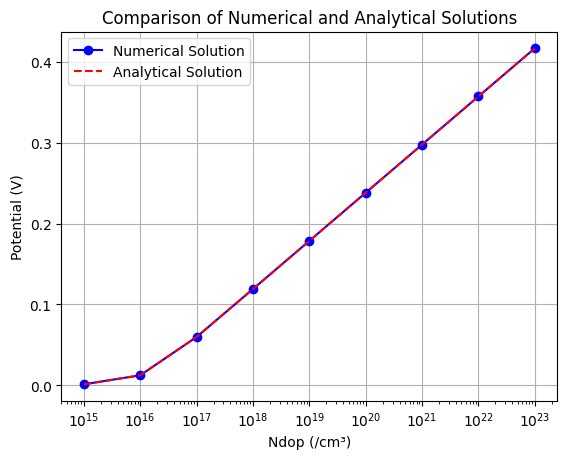

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# 상수 정의
q, epsilon0 = 1.602e-19, 8.854e-12
e1, e2 = 11.7, 3.9
nint, kB, T = 1e16, 1.38065e-23, 300
kT = kB * T / q  # 열전위 계산
N = 9
iN = 20

# 변수 초기화
phi_numeric = np.zeros(N)
phi_analytic = np.zeros(N)
Ndop_array = np.logspace(15, 23, 9)  # 도핑 농도 배열

# Newton-Raphson 반복 시작
for iDop in range(N):
    Ndop = Ndop_array[iDop]
    phi = 0.3  # 초기 guess

    for Newton in range(iN):
        res = q * (Ndop + nint * np.exp(-phi / kT) - nint * np.exp(phi / kT))
        Jaco = q * (-nint * np.exp(-phi / kT) - nint * np.exp(phi / kT)) / kT
        update_phi = -res / Jaco
        update_phi=np.clip(update_phi,-0.5,0.5)
        phi += update_phi

        if abs(update_phi) < 1e-15:
            break

    phi_numeric[iDop] = phi
    phi_analytic[iDop] = kT * np.arcsinh(Ndop / (2 * nint))

# 결과 출력
plt.semilogx(Ndop_array, phi_numeric, 'bo-', label='Numerical Solution')
plt.semilogx(Ndop_array, phi_analytic, 'r--', label='Analytical Solution')
plt.xlabel('Ndop (/cm³)'), plt.ylabel('Potential (V)'), plt.title('Comparison of Numerical and Analytical Solutions')
plt.legend(), plt.grid(True)
plt.show()


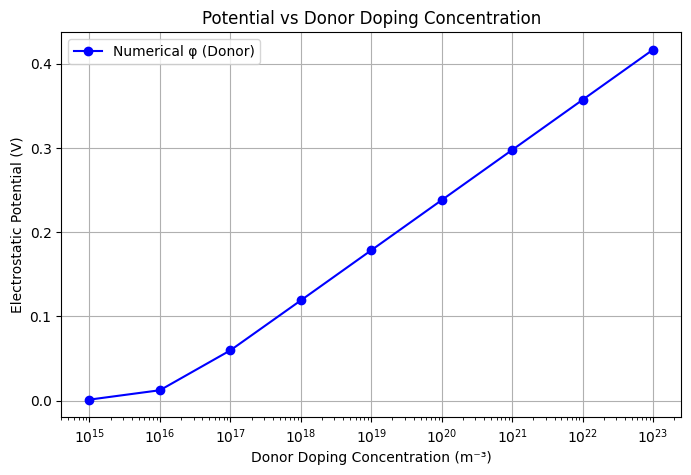

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.602e-19    # Charge of an electron (C)
nint = 1e16      # Intrinsic carrier concentration (m⁻³)
k_B = 1.38065e-23  # Boltzmann constant (J/K)
T = 300          # Temperature (K)
kT = k_B * T / q  # Thermal voltage (V)
inewton = 20     # Newton iteration count

# Doping concentration (m⁻³)
Ndop = np.array([1e15, 1e16, 1e17, 1e18, 1e19, 1e20, 1e21, 1e22, 1e23])
phi_num = np.zeros(9)  # Store phi results

# Loop through each doping value
for i, Nd in enumerate(Ndop):
    phi = 0.1  # Initial guess

    for it in range(inewton):
        # Calculate residual and Jacobian for the current doping concentration
        res = q * (Nd + nint * np.exp(-phi / kT) - nint * np.exp(phi / kT))
        Jaco = q * (-nint * np.exp(-phi / kT) - nint * np.exp(phi / kT)) / kT
        update_phi = -res / Jaco
        update_phi=np.clip(update_phi,-0.5,0.5)
        # Update phi
        phi += update_phi

        # Stop if converged
        if abs(update_phi) < 1e-5:
            break

    phi_num[i] = phi  # Store the result for the current doping concentration

# Plotting
plt.figure(figsize=(8, 5))
plt.semilogx(Ndop, phi_num, 'bo-', label='Numerical φ (Donor)')
plt.xlabel("Donor Doping Concentration (m⁻³)")
plt.ylabel("Electrostatic Potential (V)")
plt.title("Potential vs Donor Doping Concentration")
plt.grid(True)
plt.legend()
plt.show()


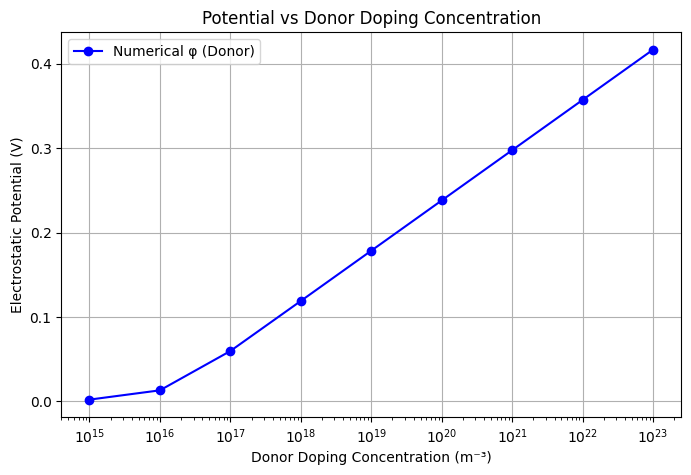

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.602e-19    # Charge of an electron (C)
nint = 1e16      # Intrinsic carrier concentration (m⁻³)
k_B = 1.38065e-23  # Boltzmann constant (J/K)
T = 300          # Temperature (K)
kT = k_B * T / q  # Thermal voltage (V)
inewton = 20      # Number of iterations for Newton's method

Ndop = np.logspace(15, 23, 9)  # Doping concentration (m⁻³)
phi_num = np.zeros(len(Ndop))  # Update phi_num size to match Ndop

# Initial guess for phi (electrostatic potential)
phi = np.zeros(len(Ndop))  # Initialize phi with the same length as Ndop
phi=0.5

for ii in range(inewton):
    # Calculate the residuals and Jacobian for the Newton-Raphson method
    res = q * (Ndop + nint * np.exp(-phi / kT) - nint * np.exp(phi / kT))
    Jaco = q * (-nint * np.exp(-phi / kT) - nint * np.exp(phi / kT)) / kT
    
    # Update the electrostatic potential (phi)
    update_phi = -res / Jaco
    update_phi=np.clip(update_phi,-0.5,0.5)
    phi += update_phi
    
    # Check for convergence
    if np.all(np.abs(update_phi) < 1e-15):
        break
    
    # Store the value of phi for plotting (store for each Ndop)
    phi_num = phi  # Update phi_num with the updated phi for each iteration

# Plotting the results
plt.figure(figsize=(8, 5))
plt.semilogx(Ndop, phi_num, 'bo-', label='Numerical φ (Donor)')
plt.xlabel("Donor Doping Concentration (m⁻³)")
plt.ylabel("Electrostatic Potential (V)")
plt.title("Potential vs Donor Doping Concentration")
plt.grid(True)
plt.legend()
plt.show()


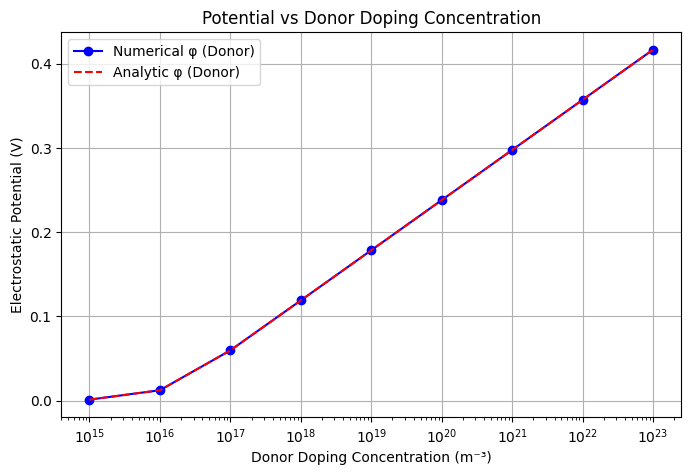

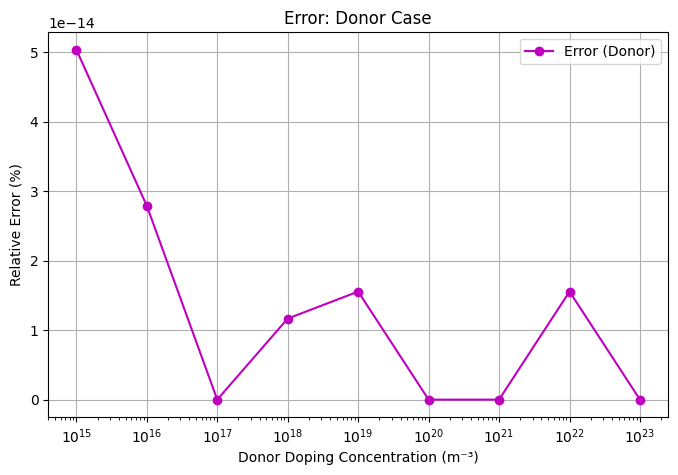

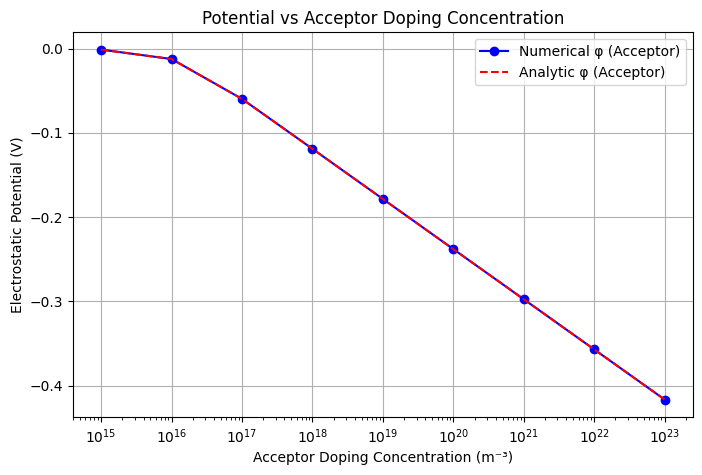

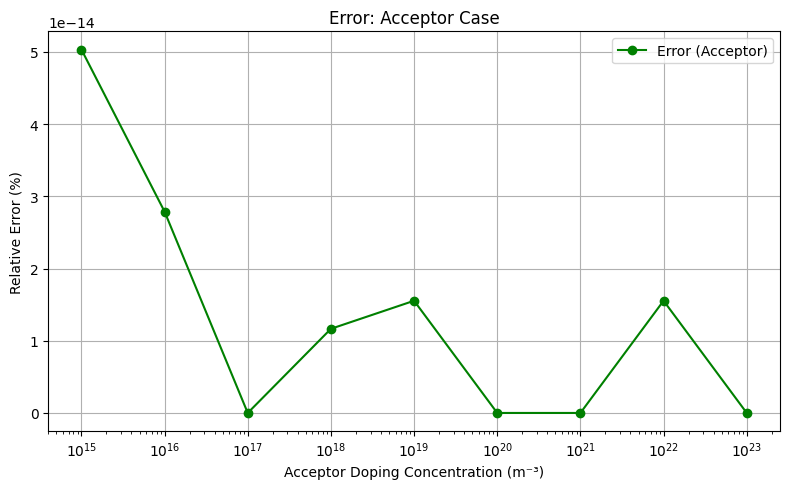

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.602e-19
nint = 1e16
k_B = 1.38065e-23
T = 300
thermal = k_B * T / q
N=20

phi_numerical = np.zeros((9, 2))
phi_analytic = np.zeros((9, 2))

#### newton in range(10)를 변경하시오. ####
#### phi를 변경하시오. ####

for Case in range(2):
    if Case == 0:
        polar = 1
        phi = 0.1
    else:
        polar = -1
        phi = -0.1

    for iDop in range(9):
        Ndop = polar * 10 ** (15 + iDop)
        for Newton in range(N):
            res = q * (Ndop + nint * np.exp(-phi / thermal) - nint * np.exp(phi / thermal))
            Jaco = q * (-nint * np.exp(-phi / thermal) - nint * np.exp(phi / thermal)) / thermal
            update_phi = -res / Jaco
            phi += update_phi
            if abs(update_phi) < 1e-15:
                break
        phi_numerical[iDop, Case] = phi
        phi_analytic[iDop, Case] = thermal * np.arcsinh(Ndop / (2 * nint))

# Calculate error
error = np.abs(phi_analytic - phi_numerical) / np.abs(phi_numerical) * 100
Ndop_list = [10**(15 + i) for i in range(9)]

# --- Plot Donor Case ---
plt.figure(figsize=(8, 5))
plt.semilogx(Ndop_list, phi_numerical[:, 0], 'bo-', label='Numerical φ (Donor)')
plt.semilogx(Ndop_list, phi_analytic[:, 0], 'r--', label='Analytic φ (Donor)')
plt.xlabel("Donor Doping Concentration (m⁻³)")
plt.ylabel("Electrostatic Potential (V)")
plt.title("Potential vs Donor Doping Concentration")
plt.grid(True)
plt.legend()

# --- Plot Error for Donor ---
plt.figure(figsize=(8, 5))
plt.semilogx(Ndop_list, error[:, 0], 'm-o', label='Error (Donor)')
plt.xlabel("Donor Doping Concentration (m⁻³)")
plt.ylabel("Relative Error (%)")
plt.title("Error: Donor Case")
plt.grid(True)
plt.legend()

# --- Plot Acceptor Case ---
plt.figure(figsize=(8, 5))
plt.semilogx(Ndop_list, phi_numerical[:, 1], 'bo-', label='Numerical φ (Acceptor)')
plt.semilogx(Ndop_list, phi_analytic[:, 1], 'r--', label='Analytic φ (Acceptor)')
plt.xlabel("Acceptor Doping Concentration (m⁻³)")
plt.ylabel("Electrostatic Potential (V)")
plt.title("Potential vs Acceptor Doping Concentration")
plt.grid(True)
plt.legend()

# --- Plot Error for Acceptor ---
plt.figure(figsize=(8, 5))
plt.semilogx(Ndop_list, error[:, 1], 'g-o', label='Error (Acceptor)')
plt.xlabel("Acceptor Doping Concentration (m⁻³)")
plt.ylabel("Relative Error (%)")
plt.title("Error: Acceptor Case")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
